## Линейная алгебра и интерполяция.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Скаляры и операции над ними

In [2]:
pi = 3.14
e = 2.7

In [3]:
np.isscalar(pi), np.isscalar(e), np.isscalar([e, pi])

(True, True, False)

In [4]:
print(pi + e) #sum
print(pi * e) #product
print(pi / e) #division

5.84
8.478000000000002
1.162962962962963


In [5]:
a = 5
b = 20
neutral_sum = 0
neutral_mul = 1

In [6]:
a + neutral_sum == a, a * neutral_mul == a

(True, True)

In [7]:
reverse_a_sum = -5
reverse_a_mul = 1/5

In [8]:
# a * x = b
# reverse_a_mul * a * x = reverse_a_mul * b
x = reverse_a_mul * b

In [9]:
x

4.0

In [10]:
reverse_a_mul * b

4.0

### Векторы

In [11]:
vec_1 = np.array([2, -6, 0, 0.8])
vec_2 = np.array([4, 6, 9, -1])

In [12]:
print(vec_1 + vec_2)
print(vec_1 * vec_2)
print(vec_1 / vec_2)

[ 6.   0.   9.  -0.2]
[  8.  -36.    0.   -0.8]
[ 0.5 -1.   0.  -0.8]


In [13]:
scalar = 0.5

In [14]:
print(vec_1 * 0.5)
print(vec_1 / 0.5)
print(vec_1 + 0.5)

[ 1.  -3.   0.   0.4]
[  4.  -12.    0.    1.6]
[ 2.5 -5.5  0.5  1.3]


In [15]:
vec_1 @ vec_2 # inner product

-28.8

In [18]:
np.sum(vec_1 * vec_2)

-28.8

In [19]:
in_prod = 0
for i in range(len(vec_1)):
    in_prod += vec_1[i] * vec_2[i]
in_prod

-28.8

### Матрицы

In [20]:
mat = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
mat_1 = np.array(mat) # mat = np.matrix(mat)
mat_1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [21]:
mat_2 = np.array([
    [0.4, 5, 3],
    [-1, 0.5, 8],
    [-1, 0, 1]
])
mat_2

array([[ 0.4,  5. ,  3. ],
       [-1. ,  0.5,  8. ],
       [-1. ,  0. ,  1. ]])

In [22]:
mat_1.shape

(3, 3)

In [23]:
print(mat_1 + mat_2, end='\n----------------\n')
print(mat_1 * -1, end='\n----------------\n')
print(mat_1 * mat_2)

[[ 1.4  7.   6. ]
 [ 3.   5.5 14. ]
 [ 6.   8.  10. ]]
----------------
[[-1 -2 -3]
 [-4 -5 -6]
 [-7 -8 -9]]
----------------
[[ 0.4 10.   9. ]
 [-4.   2.5 48. ]
 [-7.   0.   9. ]]


#### Матричное произведение

In [24]:
mat_1 @ mat_2

array([[ -4.6,   6. ,  22. ],
       [ -9.4,  22.5,  58. ],
       [-14.2,  39. ,  94. ]])

In [25]:
np.dot(mat_1, mat_2)

array([[ -4.6,   6. ,  22. ],
       [ -9.4,  22.5,  58. ],
       [-14.2,  39. ,  94. ]])

In [26]:
np.all(mat_1 @ mat_2 == np.dot(mat_1, mat_2))

True

In [28]:
mat_1.shape

(3, 3)

In [29]:
np.array([0, 1, 2]).shape

(3,)

In [30]:
mat_1 @ np.array([0, 1, 2])

array([ 8, 17, 26])

In [33]:
mat_3 = np.array([
    [0.4, 5, 3],
    [-1, 0.5, 8],
    [-1, 0, 1],
    [-1, 0, 1]
])
mat_3

array([[ 0.4,  5. ,  3. ],
       [-1. ,  0.5,  8. ],
       [-1. ,  0. ,  1. ],
       [-1. ,  0. ,  1. ]])

In [36]:
mat_1 @ mat_3

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

#### Транспонирование

In [56]:
mat_1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [57]:
mat_1.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

#### Определитель

In [37]:
np.linalg.det(mat_2)

-33.3

In [38]:
degen_mat = np.array([
    [1, 2],
    [2, 4]
])
np.linalg.det(degen_mat)

0.0

#### Обратная матрица

In [39]:
inv_mat_2 = np.linalg.inv(mat_2)
inv_mat_2

array([[-0.01501502,  0.15015015, -1.15615616],
       [ 0.21021021, -0.1021021 ,  0.18618619],
       [-0.01501502,  0.15015015, -0.15615616]])

In [40]:
mat_2

array([[ 0.4,  5. ,  3. ],
       [-1. ,  0.5,  8. ],
       [-1. ,  0. ,  1. ]])

In [41]:
res = mat_2 @ inv_mat_2
res

array([[ 1.00000000e+00,  2.77555756e-17, -5.55111512e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.56125113e-17,  1.66533454e-16,  1.00000000e+00]])

In [ ]:
res.shape

In [ ]:
import math

temp_mat = []
for i in range(res.shape[0]):
    arr = []
    for j in range(res.shape[1]):
        arr.append(math.isclose(res[i, j], 0, abs_tol=1e-10))
    temp_mat.append(arr)
temp_mat = np.array(temp_mat)
temp_mat

In [ ]:
import math

temp_mat = []
for i in range(res.shape[0]):
    arr = []
    for j in range(res.shape[1]):
        arr.append(np.round(res[i, j]))
    temp_mat.append(arr)
temp_mat = np.array(temp_mat)
temp_mat

## Интерполяция

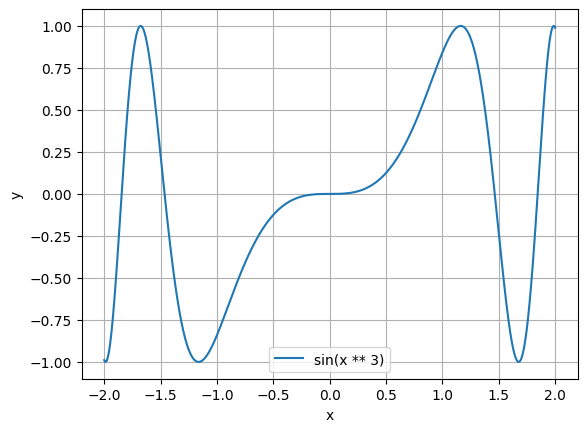

In [42]:
low_bound = -2
high_bound = 2

fig, ax = plt.subplots()
x = np.linspace(low_bound, high_bound, 1000)
y = np.sin(x ** 3)
ax.plot(x, y, label='sin(x ** 3)')
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

### Линейная интерполяция по мономам

In [111]:
deg = 15
x = np.linspace(low_bound, high_bound, deg)
y = np.sin(x ** 3)
# y = np.random.normal(3, 5, deg)

In [112]:
A = np.array([x ** i for i in range(deg)]).T

In [113]:
coef = np.linalg.inv(A) @ y

In [114]:
temp = np.linalg.solve(A, y)

In [97]:
coef

array([ 1.09634524e-15,  3.82126618e-02, -1.22124533e-15,  7.87420492e-01,
        2.08166817e-16, -1.68325969e-01])

In [89]:
def result_func(coef, x, deg=deg):
    polynom = np.array([x ** i for i in range(deg)]).T
    return polynom @ coef

In [90]:
coef

array([ 1.09634524e-15,  3.82126618e-02, -1.22124533e-15,  7.87420492e-01,
        2.08166817e-16, -1.68325969e-01])

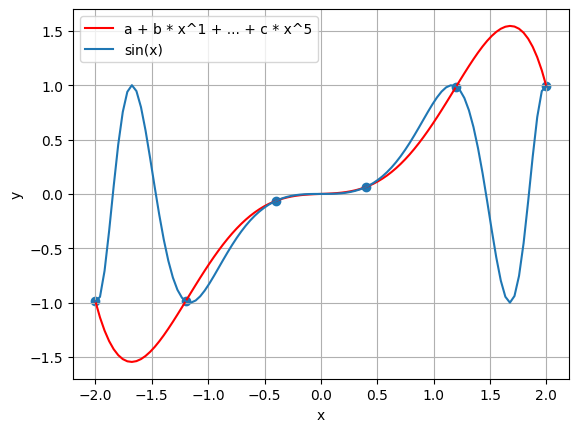

In [91]:
fig, ax = plt.subplots()
x_graph = np.linspace(low_bound, high_bound, 100)
ax.plot(x_graph, result_func(coef, x_graph), label=f"a + b * x^1 + ... + c * x^{deg - 1}", color='r')
ax.plot(x_graph, np.sin(x_graph ** 3), label='sin(x)')
ax.scatter(x, y)
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

### Полиномы Лагранжа

Пусть задана $n+1$ пара чисел $ (x_{0},y_{0}),(x_{1},y_{1}),\ldots ,(x_{n},y_{n}),$ где все
$x_{j}$ различны. Требуется построить многочлен $L(x)$ степени не более $n$, для которого
$ L(x_{j})=y_{j}$.

Ж. Л. Лагранж предложил следующий способ вычисления таких многочленов:

$$ L(x)=\sum _{i=0}^{n}y_{i}l_{i}(x),$$
где базисные полиномы $l_{i}$ определяются по формуле
$$ l_{i}(x)=\prod _{j=0,j\neq i}^{n}{\frac {x-x_{j}}{x_{i}-x_{j}}}={\frac {x-x_{0}}{x_{i}-x_{0}}}\cdots {\frac {x-x_{i-1}}{x_{i}-x_{i-1}}}\cdot {\frac {x-x_{i+1}}{x_{i}-x_{i+1}}}\cdots {\frac {x-x_{n}}{x_{i}-x_{n}}}$$

# Домашнее задание(до понедельника):
1. Решить следующие примеры "руками", а затем проверить на Python:
    - Вычислить произведение матриц: $\left(\begin{array}{lll}1 & -3 & 2 \\ 3 & -4 & 1 \\ 2 & -5 & 3\end{array}\right) \cdot\left(\begin{array}{lll}2 & 5 & 6 \\ 1 & 2 & 5 \\ 1 & 3 & 2\end{array}\right)$
    - Вычислить произведение матриц: $\left(\begin{array}{ll}4 & 3 \\ 7 & 5\end{array}\right) \cdot\left(\begin{array}{cc}-28 & 93 \\ 38 & -126\end{array}\right) \cdot\left(\begin{array}{ll}7 & 3 \\ 2 & 1\end{array}\right)$
    - Вычислить произведение матриц: $\left(\begin{array}{lll}1 & -3 & 2 \\ 3 & -4 & 1 \\ 2 & -5 & 3\end{array}\right) \cdot\left(\begin{array}{lll}2 & 5 & 6 \\ 1 & 2 & 5 \\ 1 & 3 & 2 \\ 24 & 22 & 13\end{array}\right)$
2. Выбрать свои базисные функции и построить на них линейную интерполяцию. (Кол-во функций должно равняться кол-ву опорных точек, например, $ f_n=(x - n)^n $)